In [193]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [194]:
# We will be previewing images alongthe way, so lets create a function
def previewImg(text,img_preview,grayscale=False):
    #plt.imshow(img_preview)
    if grayscale==False:
        #convert a color image from BGR to RGB before previewing
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_BGR2RGB))
    else:
        #option for Grayscale images
        plt.imshow(cv2.cvtColor(img_preview, cv2.COLOR_GRAY2RGB))
    plt.title(text)
    plt.show()

In [195]:
#load model
model = torch.hub.load('yolov5', 'custom', source='local', path='yolov5/cobest.pt', force_reload=True)

model.eval()

YOLOv5  2022-12-22 Python-3.10.8 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [196]:
# #load model
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/cobest.pt', force_reload=True)

# model.eval()


In [197]:
#read input image
img = cv2.imread('test_data/14.jpg')
img_raw = img.copy()
img = img[ 20: 660, 520: 1260]

#read ouput from model
results = model(img)

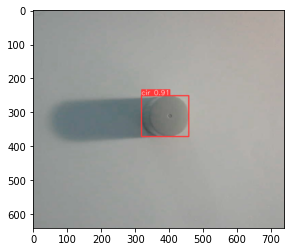

In [198]:
%matplotlib inline 
img = np.squeeze(results.render())
img_old = img.copy()
# img_raw = img.copy()
cv2.imwrite('test_data/result_yolo.jpg', img)
plt.imshow(np.squeeze(results.render()))
plt.show()

In [199]:
bboxes = results.xyxy

In [200]:
np.array(bboxes[0][0][0])

array(     318.08, dtype=float32)

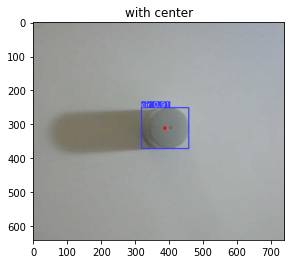

In [201]:
#tâm xác định bởi YOLO

x_p = (bboxes[0][0][0] + bboxes[0][0][2])/2
y_p = (bboxes[0][0][1] + bboxes[0][0][3])/2

img_with_center = cv2.circle(img, (int(x_p),int(y_p)), radius=0, color = (0,0,255), thickness = 10)
previewImg("with center", img_with_center)

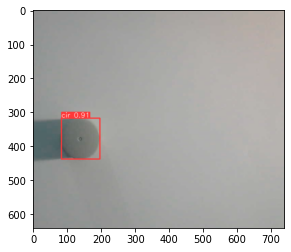

In [202]:
#tính tạo độ tâm khi vật thẳng với cam
img = cv2.imread('test_data/1.jpg')
img = img[ 20: 660, 520: 1260]
model.eval()
results = model(img)
bboxes = results.xyxy

%matplotlib inline 
img = np.squeeze(results.render())

cv2.imwrite('test_data/result_1_yolo.jpg', img)
plt.imshow(np.squeeze(results.render()))
plt.show()



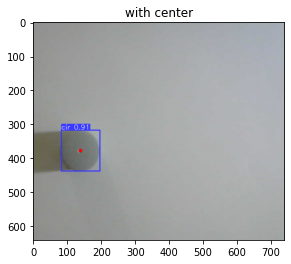

In [203]:
x_c = (bboxes[0][0][0] + bboxes[0][0][2])/2
y_c = (bboxes[0][0][1] + bboxes[0][0][3])/2

r_centers = abs(bboxes[0][0][0] - bboxes[0][0][2])/2
img_with_center = cv2.circle(img, (int(x_c),int(y_c)), radius=0, color = (0,0,255), thickness = 10)
previewImg("with center", img_with_center)

In [204]:
r_centers

tensor(56.78046)

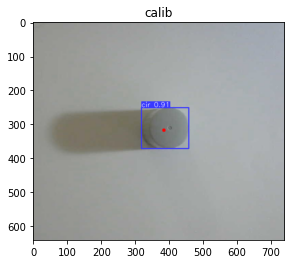

In [205]:
#tính toán sai khác
h_a = 3.7
h_c = 40

x_a = x_p + h_a / h_c *(x_c - x_p) +20
y_a = y_p + h_a / h_c *(y_c - y_p) 

calib_img = cv2.circle(img_old, (int(x_a), int(y_a)), radius = 0, color= [0,0,255], thickness= 10)
previewImg('calib',calib_img)

In [206]:
# real_detect =  cv2.circle(calib_img, (int(x_a),int(y_a)), radius=int(r_centers)+1, color = (0,0,255), thickness = 2)
# previewImg('r', real_detect)

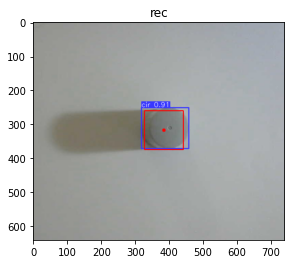

In [207]:
#vẽ hình chữ nhật bao ngoài đường tròn
x_1 = x_a - r_centers
y_1 = y_a + r_centers

x_2 = x_a + r_centers
y_2 = y_a - r_centers

real_detect_rec = cv2.rectangle(calib_img, (int(x_1), int(y_1)), (int(x_2), int(y_2)), color=(0, 0, 255), thickness=2)
cv2.imwrite('result/8.jpg', real_detect_rec)
previewImg('rec', real_detect_rec)

Hiệu chỉnh tạo độ

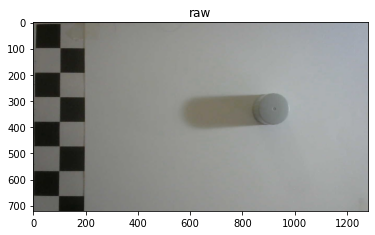

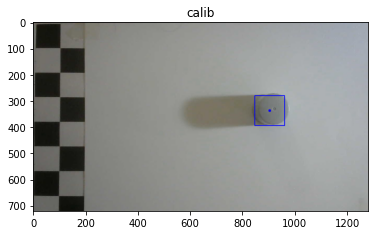

In [208]:
#vẽ hình chữ nhật với toàn bộ ảnh
x_1_all = x_1 + 520
y_1_all = y_1 + 20

x_2_all = x_2 + 520
y_2_all = y_2 + 20

x_center_all = (x_1_all+x_2_all)/2 
y_center_all = (y_1_all+y_2_all)/2

previewImg('raw', img_raw)
raw_draw = cv2.rectangle(img_raw, (int(x_1_all), int(y_1_all)), (int(x_2_all), int(y_2_all)), color=(255, 0, 0), thickness=2)
calib_img = cv2.circle(raw_draw, (int(x_center_all), int(y_center_all)), radius = 0, color= [255,0,5], thickness= 10)

previewImg('calib',raw_draw)

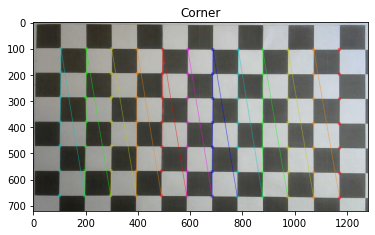

In [209]:
# trích xuất góc bàn cờ
boardHeight = 12
boardWidth = 7
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((boardHeight*boardWidth,3), np.float32)
objp[:,:2] = np.mgrid[0:boardWidth, 0:boardHeight].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
# Make a list of calibration images
images = glob.glob('test_data/00.jpg')
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    chess = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (boardWidth,boardHeight), None)
# If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
# Draw and display the corners
        cv2.drawChessboardCorners(img, (boardWidth,boardHeight), corners, ret)
        

        previewImg('Corner',img)
        
        # cv2.imwrite('image/n_bg_corners.jpg', img)
    else:
        print("Error")

In [210]:
for i in range (0, boardHeight*boardWidth):
    image = cv2.circle(raw_draw, (int(imgpoints[0][i][0][0]), int(imgpoints[0][i][0][1])), radius=0, color=(0, 0, 255), thickness=10)
    imachess_cornerge = cv2.putText(chess, str(i), (int(imgpoints[0][i][0][0]) + 10, int(imgpoints[0][i][0][1])-10), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                 (0, 200, 255), 1, cv2.LINE_AA, False)
    chess_corner  = cv2.circle(chess, (int(imgpoints[0][i][0][0]), int(imgpoints[0][i][0][1])), radius=0, color=(0, 0, 255), thickness=10)
    if (i%7 ==0) or (i< 7):
        text = '(' + str(int(objpoints[0][i][0])) +','+ str(int(objpoints[0][i][1])) + ')'
        
        image = cv2.putText(image, text, (int(imgpoints[0][i][0][0]) + 10, int(imgpoints[0][i][0][1])-10), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                 (0, 0, 255), 1, cv2.LINE_AA, False)
    # print("index corner: ", i)
# test_point = [850, 350]
# chess_corner  = cv2.circle(image, (test_point[0], test_point[1]), radius=0, color=(0, 150, 255), thickness=10)    
# previewImg("With chess", chess_corner)
# cv2.imwrite('image5/result_chess.jpg', chess_corner)
# previewImg("object with grid", image)
# cv2.imwrite('image5/result.jpg', image)

Tìm tọa độ vật so với hệ tọa độ bàn cờ

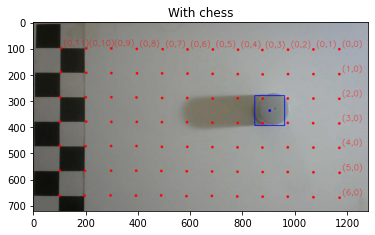

In [211]:
#điểm cần thử nghiệm
test_point = [x_center_all, y_center_all]
cv2.imwrite('chess/chess_object.jpg', image[ 20: 660, 520: 1260])

previewImg("With chess", image)

In [212]:
#tìm tạo độ đỉnh gần nhất
a = (test_point - np.array(imgpoints))*(test_point - np.array(imgpoints))
x= []
for i in range (0, boardHeight*boardWidth):
    sum = np.sum(a[0][i][0])
    x.append(sum)
nearest_point_index = np.argmin(x)
print(nearest_point_index)

23


In [213]:
#Gán giá trị điểm gần nhất với hệ tọa độ pixel và hệ tọa độ bàn cờ
nearest_point = np.array([imgpoints[0][nearest_point_index][0][0] , imgpoints[0][nearest_point_index][0][1]])
r_nearest_point = np.array([objpoints[0][nearest_point_index][1], objpoints[0][nearest_point_index][0]])
print(nearest_point, r_nearest_point)

[     877.78      291.89] [          3           2]


In [214]:
#rato
r = int(imgpoints[0][nearest_point_index+1][0][1]) - int(imgpoints[0][nearest_point_index][0][1]) 
print(r)

94


In [215]:
#tọa độ với bàn cờ được ruy ra 
r_test_point= np.array([0, 0])
x = r_nearest_point[0] - 1/r * (test_point[0] - nearest_point[0] )
y = r_nearest_point[1] + 1/r * (test_point[1] - nearest_point[1] )
r_test_point = [np.round(x, 2) ,np.round (y,2)]

In [216]:
r_test_point = np.array(r_test_point )

In [217]:
np.round((12-r_test_point[0])*2.6,2)

24.15

In [218]:
np.round((1+r_test_point[1])*2.5,2)

8.73

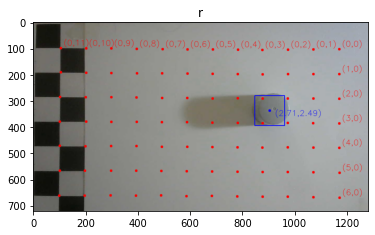

In [219]:
# vẽ tọa độ lên ảnh
text = '(' + str((r_test_point[0])) +','+ str((r_test_point[1])) + ')'
image = cv2.putText(image, text, (int(test_point[0]) + 20, int(test_point[1])+20), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                 (255, 0, 0), 1, cv2.LINE_AA, False)
previewImg('r', image)